# Intro
We want to ask if LCL8664 is more similar to other human and macaque LCLs than it is to other macaque tissues. To answer this we will download RNA-seq data from previously published datasets and then do a principle component analysis.  

## Download published data

There are two datasets to use for now, both use data from the Gilad lab and provide human/rhesus RNA-seq data for LCLs, liver, heart, lung, and kidney. 

The LCL data is available at GEO number GSE24111 and the other tissues are availible at GSE112356. 

The LCL data has 3 truly biological replicates. But I think the data is SE reads. 

Human Rep 1 - SRR066745  
Human Rep 2 - SRR066746  
Human Rep 3 - SRR066747  

Rhesus Rep 1 - SRR066751  
Rhesus Rep 2 - SRR066752  
Rhesus Rep 3 - SRR066753  

In [1]:
# bash kernel 

cd /data/hodges_lab/public_data/human-rhesus_RNA-seq/cain_2011_LCLs

#don't need to split because they are SE and we are not providing a filter here. 
for ID in {066745..066747} {066751..066753}
do
fastq-dump --readids --dumpbase --clip SRR${ID}
done

Read 11546305 spots for SRR066745
Written 11546305 spots for SRR066745
Read 13225749 spots for SRR066746
Written 13225749 spots for SRR066746
Read 13693251 spots for SRR066747
Written 13693251 spots for SRR066747
Read 13600890 spots for SRR066751
Written 13600890 spots for SRR066751
Read 14354061 spots for SRR066752
Written 14354061 spots for SRR066752
Read 14664858 spots for SRR066753
Written 14664858 spots for SRR066753


The other tissue data has 4 replicates for each tissue type. It is also SE 50bp reads.   
  
Human Heart Rep 1 - SRR6900781    #this was later reclassified as liver  
Human Kidney Rep 1 - SRR6900782    
Human Liver Rep 1 - SRR6900783  
Human Lung Rep 1 - SRR6900784  
  
Human Heart Rep 2 - SRR6900785    
Human Kidney Rep 2 - SRR6900786    
Human Liver Rep 2 - SRR6900787  
Human Lung Rep 2 - SRR6900788  
  
Human Heart Rep 3 - SRR6900789    
Human Kidney Rep 3 - SRR6900790   
Human Liver Rep 3 - SRR6900791  
Human Lung Rep 3 - SRR6900792  
  
Human Heart Rep 4 - SRR6900793    
Human Kidney Rep 4 - SRR6900794   
Human Liver Rep 4 - SRR6900795  
Human Lung Rep 4 - SRR6900796  
  
------------------------------  
  
Macaque Heart Rep 1 - SRR6900797    
Macaque Kidney Rep 1 - SRR6900798    
Macaque Liver Rep 1 - SRR6900799  
Macaque Lung Rep 1 - SRR6900800  
  
Macaque Heart Rep 2 - SRR6900801    
Macaque Kidney Rep 2 - SRR6900802    
Macaque Liver Rep 2 - SRR6900803  
Macaque Lung Rep 2 - SRR6900804  
  
Macaque Heart Rep 3 - SRR6900805    
Macaque Kidney Rep 3 - SRR6900806   
Macaque Liver Rep 3 - SRR6900807  
Macaque Lung Rep 3 - SRR6900808  
  
Macaque Heart Rep 4 - SRR6900809    
Macaque Kidney Rep 4 - SRR6900810   
Macaque Liver Rep 4 - SRR6900811  
Macaque Lung Rep 4 - SRR6900812  

In [ ]:
cd /data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020

#I'm using code from here: https://edwards.sdsu.edu/research/fastq-dump/
for ID in {6900781..6900812}
do
fastq-dump --readids --dumpbase --clip SRR${ID} 
done

Read 49454353 spots for SRR6900781
Written 49454353 spots for SRR6900781
Read 51561113 spots for SRR6900782
Written 51561113 spots for SRR6900782
Read 52075498 spots for SRR6900783
Written 52075498 spots for SRR6900783
Read 37288850 spots for SRR6900784
Written 37288850 spots for SRR6900784
Read 54401264 spots for SRR6900785
Written 54401264 spots for SRR6900785
Read 39897793 spots for SRR6900786
Written 39897793 spots for SRR6900786
Read 45973935 spots for SRR6900787
Written 45973935 spots for SRR6900787
Read 55919583 spots for SRR6900788
Written 55919583 spots for SRR6900788
Read 44831283 spots for SRR6900789
Written 44831283 spots for SRR6900789
Read 53229453 spots for SRR6900790
Written 53229453 spots for SRR6900790
Read 56612635 spots for SRR6900791
Written 56612635 spots for SRR6900791
Read 54805139 spots for SRR6900792
Written 54805139 spots for SRR6900792
Read 53976289 spots for SRR6900793
Written 53976289 spots for SRR6900793
Read 62323442 spots for SRR6900794
Written 62323442

In [5]:
#the process above was terminated at file 801. Restart from 801. 
cd /data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020

#I'm using code from here: https://edwards.sdsu.edu/research/fastq-dump/
for ID in {6900801..6900812}
do
fastq-dump --readids --dumpbase --clip SRR${ID} 
done

Read 44327075 spots for SRR6900801
Written 44327075 spots for SRR6900801
Read 42329034 spots for SRR6900802
Written 42329034 spots for SRR6900802
Read 53260438 spots for SRR6900803
Written 53260438 spots for SRR6900803
Read 53365024 spots for SRR6900804
Written 53365024 spots for SRR6900804
Read 67491954 spots for SRR6900805
Written 67491954 spots for SRR6900805
Read 46319360 spots for SRR6900806
Written 46319360 spots for SRR6900806
Read 56022681 spots for SRR6900807
Written 56022681 spots for SRR6900807
Read 62067186 spots for SRR6900808
Written 62067186 spots for SRR6900808
Read 48437093 spots for SRR6900809
Written 48437093 spots for SRR6900809
Read 54857579 spots for SRR6900810
Written 54857579 spots for SRR6900810
Read 73133582 spots for SRR6900811
Written 73133582 spots for SRR6900811
Read 61868144 spots for SRR6900812
Written 61868144 spots for SRR6900812


## Trimming

In [4]:
#tester

DIR='/data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020'

trim_galore --fastqc --fastqc_args "--outdir ${DIR}/processing_results/fastQC" \
    --dont_gzip --basename Macaque_Heart_R2 --output_dir ${DIR}/fastq/trimmed_reads \
    ${DIR}/fastq/SRR6900801.fastq -j 8

Using an excessive number of cores has a diminishing return! It is recommended not to exceed 8 cores per trimming process (you asked for 8 cores). Please consider re-specifying
Path to Cutadapt set as: 'cutadapt' (default)
Cutadapt seems to be working fine (tested command 'cutadapt --version')
Cutadapt version: 1.18
Could not detect version of Python used by Cutadapt from the first line of Cutadapt (but found this: >>>#!/bin/sh<<<)
Letting the (modified) Cutadapt deal with the Python version instead
pigz 2.6
Parallel gzip (pigz) detected. Proceeding with multicore (de)compression using 8 cores

No quality encoding type selected. Assuming that the data provided uses Sanger encoded Phred scores (default)

Output will be written into the directory: /gpfs52/data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/fastq/trimmed_reads/
Using user-specified basename (>>Macaque_Heart_R2<<) instead of deriving the filename from the input file(s)


AUTO-DETECTING ADAPTER TYPE
Attempting to au

In [5]:
#show file assignments 
cat /data/hodges_lab/public_data/human-rhesus_RNA-seq/LCL_names.txt

Human_LCL_R1 SRR066745
Human_LCL_R2 SRR066746
Human_LCL_R3 SRR066747
Rhesus_LCL_R1 SRR066751
Rhesus_LCL_R2 SRR066752
Rhesus_LCL_R3 SRR066753


In [10]:
cat /data/hodges_lab/public_data/human-rhesus_RNA-seq/tissues_names.txt

Human_Heart_R1 SRR6900781
Human_Kidney_R1 SRR6900782
Human_Liver_R1 SRR6900783
Human_Lung_R1 SRR6900784
Human_Heart_R2 SRR6900785
Human_Kidney_R2 SRR6900786
Human_Liver_R2 SRR6900787
Human_Lung_R2 SRR6900788
Human_Heart_R3 SRR6900789
Human_Kidney_R3 SRR6900790
Human_Liver_R3 SRR6900791
Human_Lung_R3 SRR6900792
Human_Heart_R4 SRR6900793
Human_Kidney_R4 SRR6900794
Human_Liver_R4 SRR6900795
Human_Lung_R4 SRR6900796
Macaque_Heart_R1 SRR6900797
Macaque_Kidney_R1 SRR6900798
Macaque_Liver_R1 SRR6900799
Macaque_Lung_R1 SRR6900800
Macaque_Heart_R2 SRR6900801
Macaque_Kidney_R2 SRR6900802
Macaque_Liver_R2 SRR6900803
Macaque_Lung_R2 SRR6900804
Macaque_Heart_R3 SRR6900805
Macaque_Kidney_R3 SRR6900806
Macaque_Liver_R3 SRR6900807
Macaque_Lung_R3 SRR6900808
Macaque_Heart_R4 SRR6900809
Macaque_Kidney_R4 SRR6900810
Macaque_Liver_R4 SRR6900811
Macaque_Lung_R4 SRR6900812


In [2]:
# use read combined with while loop to read two variables at once.
DIR='/data/hodges_lab/public_data/human-rhesus_RNA-seq/cain_2011_LCLs'

while read -r a b ; do    
    trim_galore -j 8 --fastqc --fastqc_args "--outdir ${DIR}/processing_results/fastQC" --dont_gzip --basename "$a" \
    --output_dir ${DIR}/fastq/trimmed_reads ${DIR}/fastq/"$b".fastq 
done < /data/hodges_lab/public_data/human-rhesus_RNA-seq/LCL_names.txt

Using an excessive number of cores has a diminishing return! It is recommended not to exceed 8 cores per trimming process (you asked for 8 cores). Please consider re-specifying
Path to Cutadapt set as: 'cutadapt' (default)
Cutadapt seems to be working fine (tested command 'cutadapt --version')
Cutadapt version: 1.18
Could not detect version of Python used by Cutadapt from the first line of Cutadapt (but found this: >>>#!/bin/sh<<<)
Letting the (modified) Cutadapt deal with the Python version instead
pigz 2.6
Parallel gzip (pigz) detected. Proceeding with multicore (de)compression using 8 cores

No quality encoding type selected. Assuming that the data provided uses Sanger encoded Phred scores (default)

Output will be written into the directory: /gpfs52/data/hodges_lab/public_data/human-rhesus_RNA-seq/cain_2011_LCLs/fastq/trimmed_reads/
Using user-specified basename (>>Human_LCL_R1<<) instead of deriving the filename from the input file(s)


AUTO-DETECTING ADAPTER TYPE
Attempting to au

Minimum required adapter overlap (stringency): 1 bp
Minimum required sequence length before a sequence gets removed: 20 bp
Running FastQC on the data once trimming has completed
Running FastQC with the following extra arguments: '--outdir /data/hodges_lab/public_data/human-rhesus_RNA-seq/cain_2011_LCLs/processing_results/fastQC'

Cutadapt seems to be reasonably up-to-date. Setting -j 8
Writing final adapter and quality trimmed output to SRR066746_trimmed.fq


  >>> Now performing quality (cutoff '-q 20') and adapter trimming in a single pass for the adapter sequence: 'AGATCGGAAGAGC' from file /data/hodges_lab/public_data/human-rhesus_RNA-seq/cain_2011_LCLs/fastq/SRR066746.fastq <<< 
10000000 sequences processed
This is cutadapt 1.18 with Python 3.6.15
Command line parameters: -j 8 -e 0.1 -q 20 -O 1 -a AGATCGGAAGAGC /data/hodges_lab/public_data/human-rhesus_RNA-seq/cain_2011_LCLs/fastq/SRR066746.fastq
Processing reads on 8 cores in single-end mode ...
Finished in 53.78 s (4 us/read; 14.

24	24	0.2	1	9 15
25	25	0.2	1	9 16
26	70	0.2	1	30 40
27	4959	0.2	1	4475 484
28	119	0.2	1	64 55
29	107	0.2	1	16 91
30	317	0.2	1	7 310
31	1156	0.2	1	7 1149
32	1266	0.2	1	10 1256
33	203	0.2	1	4 199
34	135	0.2	1	9 126
35	535	0.2	1	10 525
36	2134	0.2	1	2 2132


RUN STATISTICS FOR INPUT FILE: /data/hodges_lab/public_data/human-rhesus_RNA-seq/cain_2011_LCLs/fastq/SRR066747.fastq
13693251 sequences processed in total
Sequences removed because they became shorter than the length cutoff of 20 bp:	63942 (0.5%)

Now renaming the output file SRR066747_trimmed.fq

ORIGINAL FILE 1: >>SRR066747_trimmed.fq<<	RENAMING TO:>>Human_LCL_R3_trimmed.fq<<

  >>> Now running FastQC on the data <<<

Started analysis of Human_LCL_R3_trimmed.fq
Approx 5% complete for Human_LCL_R3_trimmed.fq
Approx 10% complete for Human_LCL_R3_trimmed.fq
Approx 15% complete for Human_LCL_R3_trimmed.fq
Approx 20% complete for Human_LCL_R3_trimmed.fq
Approx 25% complete for Human_LCL_R3_trimmed.fq
Approx 30% complete for Human_LCL_R3

Letting the (modified) Cutadapt deal with the Python version instead
pigz 2.6
Parallel gzip (pigz) detected. Proceeding with multicore (de)compression using 8 cores

No quality encoding type selected. Assuming that the data provided uses Sanger encoded Phred scores (default)

Output will be written into the directory: /gpfs52/data/hodges_lab/public_data/human-rhesus_RNA-seq/cain_2011_LCLs/fastq/trimmed_reads/
Using user-specified basename (>>Rhesus_LCL_R2<<) instead of deriving the filename from the input file(s)


AUTO-DETECTING ADAPTER TYPE
Attempting to auto-detect adapter type from the first 1 million sequences of the first file (>> /data/hodges_lab/public_data/human-rhesus_RNA-seq/cain_2011_LCLs/fastq/SRR066752.fastq <<)

Found perfect matches for the following adapter sequences:
Adapter type	Count	Sequence	Sequences analysed	Percentage
Illumina	94	AGATCGGAAGAGC	1000000	0.01
smallRNA	2	TGGAATTCTCGG	1000000	0.00
Nextera	0	CTGTCTCTTATA	1000000	0.00
Using Illumina adapter for trimmin



  >>> Now performing quality (cutoff '-q 20') and adapter trimming in a single pass for the adapter sequence: 'AGATCGGAAGAGC' from file /data/hodges_lab/public_data/human-rhesus_RNA-seq/cain_2011_LCLs/fastq/SRR066753.fastq <<< 
10000000 sequences processed
This is cutadapt 1.18 with Python 3.6.15
Command line parameters: -j 8 -e 0.1 -q 20 -O 1 -a AGATCGGAAGAGC /data/hodges_lab/public_data/human-rhesus_RNA-seq/cain_2011_LCLs/fastq/SRR066753.fastq
Processing reads on 8 cores in single-end mode ...
Finished in 58.05 s (4 us/read; 15.16 M reads/minute).

=== Summary ===

Total reads processed:              14,664,858
Reads with adapters:                 4,478,345 (30.5%)
Reads written (passing filters):    14,664,858 (100.0%)

Total basepairs processed:   527,934,888 bp
Quality-trimmed:               8,098,539 bp (1.5%)
Total written (filtered):    513,089,097 bp (97.2%)

=== Adapter 1 ===

Sequence: AGATCGGAAGAGC; Type: regular 3'; Length: 13; Trimmed: 4478345 times.

No. of allowed err

In [3]:
# use read combined with while loop to read two variables at once.
DIR='/data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020'

while read -r a b ; do    
    trim_galore -j 8 --fastqc --fastqc_args "--outdir ${DIR}/processing_results/fastQC" --dont_gzip --basename "$a" \
    --output_dir ${DIR}/fastq/trimmed_reads ${DIR}/fastq/"$b".fastq 
done < /data/hodges_lab/public_data/human-rhesus_RNA-seq/tissues_names.txt

Using an excessive number of cores has a diminishing return! It is recommended not to exceed 8 cores per trimming process (you asked for 8 cores). Please consider re-specifying
Path to Cutadapt set as: 'cutadapt' (default)
Cutadapt seems to be working fine (tested command 'cutadapt --version')
Cutadapt version: 1.18
Could not detect version of Python used by Cutadapt from the first line of Cutadapt (but found this: >>>#!/bin/sh<<<)
Letting the (modified) Cutadapt deal with the Python version instead
pigz 2.6
Parallel gzip (pigz) detected. Proceeding with multicore (de)compression using 8 cores

No quality encoding type selected. Assuming that the data provided uses Sanger encoded Phred scores (default)

Output will be written into the directory: /gpfs52/data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/fastq/trimmed_reads/
Using user-specified basename (>>Human_Heart_R1<<) instead of deriving the filename from the input file(s)


AUTO-DETECTING ADAPTER TYPE
Attempting to auto


SUMMARISING RUN PARAMETERS
Input filename: /data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/fastq/SRR6900782.fastq
Trimming mode: single-end
Trim Galore version: 0.6.6
Cutadapt version: 1.18
Python version: could not detect
Number of cores used for trimming: 8
Quality Phred score cutoff: 20
Quality encoding type selected: ASCII+33
Adapter sequence: 'AGATCGGAAGAGC' (Illumina TruSeq, Sanger iPCR; auto-detected)
Maximum trimming error rate: 0.1 (default)
Minimum required adapter overlap (stringency): 1 bp
Minimum required sequence length before a sequence gets removed: 20 bp
Running FastQC on the data once trimming has completed
Running FastQC with the following extra arguments: '--outdir /data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/processing_results/fastQC'

Cutadapt seems to be reasonably up-to-date. Setting -j 8
Writing final adapter and quality trimmed output to SRR6900782_trimmed.fq


  >>> Now performing quality (cutoff '-q 20') and adapter trimming in 

Reads written (passing filters):    52,075,498 (100.0%)

Total basepairs processed: 2,645,706,041 bp
Quality-trimmed:             667,056,043 bp (25.2%)
Total written (filtered):  1,936,012,685 bp (73.2%)

=== Adapter 1 ===

Sequence: AGATCGGAAGAGC; Type: regular 3'; Length: 13; Trimmed: 5145396 times.

No. of allowed errors:
0-9 bp: 0; 10-13 bp: 1

Bases preceding removed adapters:
  A: 25.5%
  C: 26.8%
  G: 18.7%
  T: 14.3%
  none/other: 14.7%

Overview of removed sequences
length	count	expect	max.err	error counts
1	3149300	13018874.5	0	3149300
2	923737	3254718.6	0	923737
3	271929	813679.7	0	271929
4	52800	203419.9	0	52800
5	11607	50855.0	0	11607
6	1435	12713.7	0	1435
7	508	3178.4	0	508
8	503	794.6	0	503
9	585	198.7	0	259 326
10	1040	49.7	1	184 856
11	1009	12.4	1	361 648
12	716	3.1	1	226 490
13	816	0.8	1	359 457
14	633	0.8	1	411 222
15	542	0.8	1	362 180
16	620	0.8	1	293 327
17	444	0.8	1	336 108
18	493	0.8	1	341 152
19	513	0.8	1	381 132
20	462	0.8	1	331 131
21	426	0.8	1	325 101
22	504

37288850 sequences processed in total
Sequences removed because they became shorter than the length cutoff of 20 bp:	9548427 (25.6%)

Now renaming the output file SRR6900784_trimmed.fq

ORIGINAL FILE 1: >>SRR6900784_trimmed.fq<<	RENAMING TO:>>Human_Lung_R1_trimmed.fq<<

  >>> Now running FastQC on the data <<<

Started analysis of Human_Lung_R1_trimmed.fq
Approx 5% complete for Human_Lung_R1_trimmed.fq
Approx 10% complete for Human_Lung_R1_trimmed.fq
Approx 15% complete for Human_Lung_R1_trimmed.fq
Approx 20% complete for Human_Lung_R1_trimmed.fq
Approx 25% complete for Human_Lung_R1_trimmed.fq
Approx 30% complete for Human_Lung_R1_trimmed.fq
Approx 35% complete for Human_Lung_R1_trimmed.fq
Approx 40% complete for Human_Lung_R1_trimmed.fq
Approx 45% complete for Human_Lung_R1_trimmed.fq
Approx 50% complete for Human_Lung_R1_trimmed.fq
Approx 55% complete for Human_Lung_R1_trimmed.fq
Approx 60% complete for Human_Lung_R1_trimmed.fq
Approx 65% complete for Human_Lung_R1_trimmed.fq
Approx

Cutadapt version: 1.18
Could not detect version of Python used by Cutadapt from the first line of Cutadapt (but found this: >>>#!/bin/sh<<<)
Letting the (modified) Cutadapt deal with the Python version instead
pigz 2.6
Parallel gzip (pigz) detected. Proceeding with multicore (de)compression using 8 cores

No quality encoding type selected. Assuming that the data provided uses Sanger encoded Phred scores (default)

Output will be written into the directory: /gpfs52/data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/fastq/trimmed_reads/
Using user-specified basename (>>Human_Kidney_R2<<) instead of deriving the filename from the input file(s)


AUTO-DETECTING ADAPTER TYPE
Attempting to auto-detect adapter type from the first 1 million sequences of the first file (>> /data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/fastq/SRR6900786.fastq <<)

Found perfect matches for the following adapter sequences:
Adapter type	Count	Sequence	Sequences analysed	Percentage
Illumina	5

Quality Phred score cutoff: 20
Quality encoding type selected: ASCII+33
Adapter sequence: 'AGATCGGAAGAGC' (Illumina TruSeq, Sanger iPCR; auto-detected)
Maximum trimming error rate: 0.1 (default)
Minimum required adapter overlap (stringency): 1 bp
Minimum required sequence length before a sequence gets removed: 20 bp
Running FastQC on the data once trimming has completed
Running FastQC with the following extra arguments: '--outdir /data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/processing_results/fastQC'

Cutadapt seems to be reasonably up-to-date. Setting -j 8
Writing final adapter and quality trimmed output to SRR6900787_trimmed.fq


  >>> Now performing quality (cutoff '-q 20') and adapter trimming in a single pass for the adapter sequence: 'AGATCGGAAGAGC' from file /data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/fastq/SRR6900787.fastq <<< 
10000000 sequences processed
20000000 sequences processed
30000000 sequences processed
40000000 sequences processed
Thi


=== Adapter 1 ===

Sequence: AGATCGGAAGAGC; Type: regular 3'; Length: 13; Trimmed: 6669919 times.

No. of allowed errors:
0-9 bp: 0; 10-13 bp: 1

Bases preceding removed adapters:
  A: 21.4%
  C: 23.0%
  G: 16.0%
  T: 11.7%
  none/other: 27.9%

Overview of removed sequences
length	count	expect	max.err	error counts
1	3414380	13979895.8	0	3414380
2	1029903	3494973.9	0	1029903
3	306483	873743.5	0	306483
4	58452	218435.9	0	58452
5	14773	54609.0	0	14773
6	2145	13652.2	0	2145
7	936	3413.1	0	936
8	953	853.3	0	953
9	1280	213.3	0	478 802
10	1992	53.3	1	477 1515
11	1907	13.3	1	698 1209
12	1570	3.3	1	478 1092
13	1471	0.8	1	663 808
14	1040	0.8	1	818 222
15	1128	0.8	1	884 244
16	981	0.8	1	769 212
17	944	0.8	1	764 180
18	1049	0.8	1	739 310
19	1140	0.8	1	861 279
20	1006	0.8	1	791 215
21	907	0.8	1	717 190
22	1134	0.8	1	786 348
23	1213	0.8	1	929 284
24	1146	0.8	1	927 219
25	1170	0.8	1	891 279
26	1134	0.8	1	920 214
27	1155	0.8	1	904 251
28	1231	0.8	1	913 318
29	1353	0.8	1	1068 285
30	1546	0.8	1	1138 40


Now renaming the output file SRR6900789_trimmed.fq

ORIGINAL FILE 1: >>SRR6900789_trimmed.fq<<	RENAMING TO:>>Human_Heart_R3_trimmed.fq<<

  >>> Now running FastQC on the data <<<

Started analysis of Human_Heart_R3_trimmed.fq
Approx 5% complete for Human_Heart_R3_trimmed.fq
Approx 10% complete for Human_Heart_R3_trimmed.fq
Approx 15% complete for Human_Heart_R3_trimmed.fq
Approx 20% complete for Human_Heart_R3_trimmed.fq
Approx 25% complete for Human_Heart_R3_trimmed.fq
Approx 30% complete for Human_Heart_R3_trimmed.fq
Approx 35% complete for Human_Heart_R3_trimmed.fq
Approx 40% complete for Human_Heart_R3_trimmed.fq
Approx 45% complete for Human_Heart_R3_trimmed.fq
Approx 50% complete for Human_Heart_R3_trimmed.fq
Approx 55% complete for Human_Heart_R3_trimmed.fq
Approx 60% complete for Human_Heart_R3_trimmed.fq
Approx 65% complete for Human_Heart_R3_trimmed.fq
Approx 70% complete for Human_Heart_R3_trimmed.fq
Approx 75% complete for Human_Heart_R3_trimmed.fq
Approx 80% complete for 

pigz 2.6
Parallel gzip (pigz) detected. Proceeding with multicore (de)compression using 8 cores

No quality encoding type selected. Assuming that the data provided uses Sanger encoded Phred scores (default)

Output will be written into the directory: /gpfs52/data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/fastq/trimmed_reads/
Using user-specified basename (>>Human_Liver_R3<<) instead of deriving the filename from the input file(s)


AUTO-DETECTING ADAPTER TYPE
Attempting to auto-detect adapter type from the first 1 million sequences of the first file (>> /data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/fastq/SRR6900791.fastq <<)

Found perfect matches for the following adapter sequences:
Adapter type	Count	Sequence	Sequences analysed	Percentage
Illumina	6182	AGATCGGAAGAGC	1000000	0.62
smallRNA	1	TGGAATTCTCGG	1000000	0.00
Nextera	1	CTGTCTCTTATA	1000000	0.00
Using Illumina adapter for trimming (count: 6182). Second best hit was smallRNA (count: 1)

Writing report 

Maximum trimming error rate: 0.1 (default)
Minimum required adapter overlap (stringency): 1 bp
Minimum required sequence length before a sequence gets removed: 20 bp
Running FastQC on the data once trimming has completed
Running FastQC with the following extra arguments: '--outdir /data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/processing_results/fastQC'

Cutadapt seems to be reasonably up-to-date. Setting -j 8
Writing final adapter and quality trimmed output to SRR6900792_trimmed.fq


  >>> Now performing quality (cutoff '-q 20') and adapter trimming in a single pass for the adapter sequence: 'AGATCGGAAGAGC' from file /data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/fastq/SRR6900792.fastq <<< 
10000000 sequences processed
20000000 sequences processed
30000000 sequences processed
40000000 sequences processed
50000000 sequences processed
This is cutadapt 1.18 with Python 3.6.15
Command line parameters: -j 8 -e 0.1 -q 20 -O 1 -a AGATCGGAAGAGC /data/hodges_lab/pub

  A: 27.0%
  C: 26.5%
  G: 18.6%
  T: 18.6%
  none/other: 9.4%

Overview of removed sequences
length	count	expect	max.err	error counts
1	4796998	13494072.2	0	4796998
2	1431032	3373518.1	0	1431032
3	357868	843379.5	0	357868
4	71500	210844.9	0	71500
5	14633	52711.2	0	14633
6	1886	13177.8	0	1886
7	491	3294.5	0	491
8	355	823.6	0	355
9	720	205.9	0	228 492
10	891	51.5	1	256 635
11	797	12.9	1	348 449
12	610	3.2	1	221 389
13	533	0.8	1	309 224
14	372	0.8	1	217 155
15	432	0.8	1	314 118
16	334	0.8	1	238 96
17	308	0.8	1	208 100
18	324	0.8	1	192 132
19	371	0.8	1	255 116
20	387	0.8	1	259 128
21	350	0.8	1	231 119
22	332	0.8	1	221 111
23	364	0.8	1	270 94
24	328	0.8	1	238 90
25	348	0.8	1	236 112
26	426	0.8	1	264 162
27	396	0.8	1	206 190
28	506	0.8	1	274 232
29	497	0.8	1	272 225
30	481	0.8	1	289 192
31	477	0.8	1	260 217
32	488	0.8	1	264 224
33	489	0.8	1	266 223
34	605	0.8	1	338 267
35	735	0.8	1	361 374
36	712	0.8	1	398 314
37	719	0.8	1	361 358
38	904	0.8	1	444 460
39	1755	0.8	1	575 1180
40	3072	0.8	1	15


Now renaming the output file SRR6900794_trimmed.fq

ORIGINAL FILE 1: >>SRR6900794_trimmed.fq<<	RENAMING TO:>>Human_Kidney_R4_trimmed.fq<<

  >>> Now running FastQC on the data <<<

Started analysis of Human_Kidney_R4_trimmed.fq
Approx 5% complete for Human_Kidney_R4_trimmed.fq
Approx 10% complete for Human_Kidney_R4_trimmed.fq
Approx 15% complete for Human_Kidney_R4_trimmed.fq
Approx 20% complete for Human_Kidney_R4_trimmed.fq
Approx 25% complete for Human_Kidney_R4_trimmed.fq
Approx 30% complete for Human_Kidney_R4_trimmed.fq
Approx 35% complete for Human_Kidney_R4_trimmed.fq
Approx 40% complete for Human_Kidney_R4_trimmed.fq
Approx 45% complete for Human_Kidney_R4_trimmed.fq
Approx 50% complete for Human_Kidney_R4_trimmed.fq
Approx 55% complete for Human_Kidney_R4_trimmed.fq
Approx 60% complete for Human_Kidney_R4_trimmed.fq
Approx 65% complete for Human_Kidney_R4_trimmed.fq
Approx 70% complete for Human_Kidney_R4_trimmed.fq
Approx 75% complete for Human_Kidney_R4_trimmed.fq
Approx 

Could not detect version of Python used by Cutadapt from the first line of Cutadapt (but found this: >>>#!/bin/sh<<<)
Letting the (modified) Cutadapt deal with the Python version instead
pigz 2.6
Parallel gzip (pigz) detected. Proceeding with multicore (de)compression using 8 cores

No quality encoding type selected. Assuming that the data provided uses Sanger encoded Phred scores (default)

Output will be written into the directory: /gpfs52/data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/fastq/trimmed_reads/
Using user-specified basename (>>Human_Lung_R4<<) instead of deriving the filename from the input file(s)


AUTO-DETECTING ADAPTER TYPE
Attempting to auto-detect adapter type from the first 1 million sequences of the first file (>> /data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/fastq/SRR6900796.fastq <<)

Found perfect matches for the following adapter sequences:
Adapter type	Count	Sequence	Sequences analysed	Percentage
Illumina	8364	AGATCGGAAGAGC	1000000

Cutadapt version: 1.18
Python version: could not detect
Number of cores used for trimming: 8
Quality Phred score cutoff: 20
Quality encoding type selected: ASCII+33
Adapter sequence: 'AGATCGGAAGAGC' (Illumina TruSeq, Sanger iPCR; auto-detected)
Maximum trimming error rate: 0.1 (default)
Minimum required adapter overlap (stringency): 1 bp
Minimum required sequence length before a sequence gets removed: 20 bp
Running FastQC on the data once trimming has completed
Running FastQC with the following extra arguments: '--outdir /data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/processing_results/fastQC'

Cutadapt seems to be reasonably up-to-date. Setting -j 8
Writing final adapter and quality trimmed output to SRR6900797_trimmed.fq


  >>> Now performing quality (cutoff '-q 20') and adapter trimming in a single pass for the adapter sequence: 'AGATCGGAAGAGC' from file /data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/fastq/SRR6900797.fastq <<< 
10000000 sequences process


Sequence: AGATCGGAAGAGC; Type: regular 3'; Length: 13; Trimmed: 2257392 times.

No. of allowed errors:
0-9 bp: 0; 10-13 bp: 1

Bases preceding removed adapters:
  A: 30.4%
  C: 28.6%
  G: 19.0%
  T: 19.7%
  none/other: 2.2%

Overview of removed sequences
length	count	expect	max.err	error counts
1	1607355	8594696.0	0	1607355
2	443638	2148674.0	0	443638
3	126578	537168.5	0	126578
4	26620	134292.1	0	26620
5	5170	33573.0	0	5170
6	586	8393.3	0	586
7	132	2098.3	0	132
8	80	524.6	0	80
9	157	131.1	0	72 85
10	347	32.8	1	25 322
11	294	8.2	1	42 252
12	240	2.0	1	26 214
13	191	0.5	1	28 163
14	213	0.5	1	184 29
15	184	0.5	1	162 22
16	195	0.5	1	176 19
17	176	0.5	1	152 24
18	194	0.5	1	167 27
19	206	0.5	1	183 23
20	196	0.5	1	159 37
21	164	0.5	1	145 19
22	172	0.5	1	154 18
23	178	0.5	1	161 17
24	196	0.5	1	173 23
25	184	0.5	1	166 18
26	223	0.5	1	199 24
27	187	0.5	1	164 23
28	219	0.5	1	191 28
29	221	0.5	1	197 24
30	243	0.5	1	212 31
31	207	0.5	1	184 23
32	230	0.5	1	206 24
33	268	0.5	1	234 34
34	229	0.5	1	196


ORIGINAL FILE 1: >>SRR6900799_trimmed.fq<<	RENAMING TO:>>Macaque_Liver_R1_trimmed.fq<<

  >>> Now running FastQC on the data <<<

Started analysis of Macaque_Liver_R1_trimmed.fq
Approx 5% complete for Macaque_Liver_R1_trimmed.fq
Approx 10% complete for Macaque_Liver_R1_trimmed.fq
Approx 15% complete for Macaque_Liver_R1_trimmed.fq
Approx 20% complete for Macaque_Liver_R1_trimmed.fq
Approx 25% complete for Macaque_Liver_R1_trimmed.fq
Approx 30% complete for Macaque_Liver_R1_trimmed.fq
Approx 35% complete for Macaque_Liver_R1_trimmed.fq
Approx 40% complete for Macaque_Liver_R1_trimmed.fq
Approx 45% complete for Macaque_Liver_R1_trimmed.fq
Approx 50% complete for Macaque_Liver_R1_trimmed.fq
Approx 55% complete for Macaque_Liver_R1_trimmed.fq
Approx 60% complete for Macaque_Liver_R1_trimmed.fq
Approx 65% complete for Macaque_Liver_R1_trimmed.fq
Approx 70% complete for Macaque_Liver_R1_trimmed.fq
Approx 75% complete for Macaque_Liver_R1_trimmed.fq
Approx 80% complete for Macaque_Liver_R1_t

pigz 2.6
Parallel gzip (pigz) detected. Proceeding with multicore (de)compression using 8 cores

No quality encoding type selected. Assuming that the data provided uses Sanger encoded Phred scores (default)

Output will be written into the directory: /gpfs52/data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/fastq/trimmed_reads/
Using user-specified basename (>>Macaque_Heart_R2<<) instead of deriving the filename from the input file(s)


AUTO-DETECTING ADAPTER TYPE
Attempting to auto-detect adapter type from the first 1 million sequences of the first file (>> /data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/fastq/SRR6900801.fastq <<)

Found perfect matches for the following adapter sequences:
Adapter type	Count	Sequence	Sequences analysed	Percentage
Illumina	1877	AGATCGGAAGAGC	1000000	0.19
smallRNA	0	TGGAATTCTCGG	1000000	0.00
Nextera	0	CTGTCTCTTATA	1000000	0.00
Using Illumina adapter for trimming (count: 1877). Second best hit was smallRNA (count: 0)

Writing repor

Minimum required adapter overlap (stringency): 1 bp
Minimum required sequence length before a sequence gets removed: 20 bp
Running FastQC on the data once trimming has completed
Running FastQC with the following extra arguments: '--outdir /data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/processing_results/fastQC'

Cutadapt seems to be reasonably up-to-date. Setting -j 8
Writing final adapter and quality trimmed output to SRR6900802_trimmed.fq


  >>> Now performing quality (cutoff '-q 20') and adapter trimming in a single pass for the adapter sequence: 'AGATCGGAAGAGC' from file /data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/fastq/SRR6900802.fastq <<< 
10000000 sequences processed
20000000 sequences processed
30000000 sequences processed
40000000 sequences processed
This is cutadapt 1.18 with Python 3.6.15
Command line parameters: -j 8 -e 0.1 -q 20 -O 1 -a AGATCGGAAGAGC /data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/fastq/SRR6900802.fastq
Processi


Bases preceding removed adapters:
  A: 30.5%
  C: 30.4%
  G: 19.7%
  T: 16.2%
  none/other: 3.3%

Overview of removed sequences
length	count	expect	max.err	error counts
1	2517944	13315109.5	0	2517944
2	731238	3328777.4	0	731238
3	203089	832194.3	0	203089
4	41164	208048.6	0	41164
5	8889	52012.1	0	8889
6	903	13003.0	0	903
7	208	3250.8	0	208
8	120	812.7	0	120
9	257	203.2	0	124 133
10	747	50.8	1	85 662
11	655	12.7	1	92 563
12	608	3.2	1	111 497
13	486	0.8	1	96 390
14	550	0.8	1	514 36
15	572	0.8	1	536 36
16	511	0.8	1	476 35
17	533	0.8	1	498 35
18	591	0.8	1	544 47
19	607	0.8	1	567 40
20	478	0.8	1	435 43
21	500	0.8	1	460 40
22	550	0.8	1	509 41
23	584	0.8	1	546 38
24	627	0.8	1	591 36
25	688	0.8	1	646 42
26	623	0.8	1	583 40
27	1290	0.8	1	1233 57
28	808	0.8	1	767 41
29	811	0.8	1	753 58
30	919	0.8	1	860 59
31	1311	0.8	1	1233 78
32	820	0.8	1	784 36
33	899	0.8	1	843 56
34	908	0.8	1	856 52
35	1043	0.8	1	966 77
36	1171	0.8	1	1034 137
37	1036	0.8	1	941 95
38	942	0.8	1	854 88
39	1063	0.8	1	911 152
40	1


Now renaming the output file SRR6900804_trimmed.fq

ORIGINAL FILE 1: >>SRR6900804_trimmed.fq<<	RENAMING TO:>>Macaque_Lung_R2_trimmed.fq<<

  >>> Now running FastQC on the data <<<

Started analysis of Macaque_Lung_R2_trimmed.fq
Approx 5% complete for Macaque_Lung_R2_trimmed.fq
Approx 10% complete for Macaque_Lung_R2_trimmed.fq
Approx 15% complete for Macaque_Lung_R2_trimmed.fq
Approx 20% complete for Macaque_Lung_R2_trimmed.fq
Approx 25% complete for Macaque_Lung_R2_trimmed.fq
Approx 30% complete for Macaque_Lung_R2_trimmed.fq
Approx 35% complete for Macaque_Lung_R2_trimmed.fq
Approx 40% complete for Macaque_Lung_R2_trimmed.fq
Approx 45% complete for Macaque_Lung_R2_trimmed.fq
Approx 50% complete for Macaque_Lung_R2_trimmed.fq
Approx 55% complete for Macaque_Lung_R2_trimmed.fq
Approx 60% complete for Macaque_Lung_R2_trimmed.fq
Approx 65% complete for Macaque_Lung_R2_trimmed.fq
Approx 70% complete for Macaque_Lung_R2_trimmed.fq
Approx 75% complete for Macaque_Lung_R2_trimmed.fq
Approx 

Letting the (modified) Cutadapt deal with the Python version instead
pigz 2.6
Parallel gzip (pigz) detected. Proceeding with multicore (de)compression using 8 cores

No quality encoding type selected. Assuming that the data provided uses Sanger encoded Phred scores (default)

Output will be written into the directory: /gpfs52/data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/fastq/trimmed_reads/
Using user-specified basename (>>Macaque_Kidney_R3<<) instead of deriving the filename from the input file(s)


AUTO-DETECTING ADAPTER TYPE
Attempting to auto-detect adapter type from the first 1 million sequences of the first file (>> /data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/fastq/SRR6900806.fastq <<)

Found perfect matches for the following adapter sequences:
Adapter type	Count	Sequence	Sequences analysed	Percentage
Illumina	513	AGATCGGAAGAGC	1000000	0.05
smallRNA	1	TGGAATTCTCGG	1000000	0.00
Nextera	1	CTGTCTCTTATA	1000000	0.00
Using Illumina adapter for trimming 

Maximum trimming error rate: 0.1 (default)
Minimum required adapter overlap (stringency): 1 bp
Minimum required sequence length before a sequence gets removed: 20 bp
Running FastQC on the data once trimming has completed
Running FastQC with the following extra arguments: '--outdir /data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/processing_results/fastQC'

Cutadapt seems to be reasonably up-to-date. Setting -j 8
Writing final adapter and quality trimmed output to SRR6900807_trimmed.fq


  >>> Now performing quality (cutoff '-q 20') and adapter trimming in a single pass for the adapter sequence: 'AGATCGGAAGAGC' from file /data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/fastq/SRR6900807.fastq <<< 
10000000 sequences processed
20000000 sequences processed
30000000 sequences processed
40000000 sequences processed
50000000 sequences processed
This is cutadapt 1.18 with Python 3.6.15
Command line parameters: -j 8 -e 0.1 -q 20 -O 1 -a AGATCGGAAGAGC /data/hodges_lab/pub


No. of allowed errors:
0-9 bp: 0; 10-13 bp: 1

Bases preceding removed adapters:
  A: 29.4%
  C: 32.0%
  G: 19.7%
  T: 15.9%
  none/other: 3.1%

Overview of removed sequences
length	count	expect	max.err	error counts
1	8864107	15516796.5	0	8864107
2	2849076	3879199.1	0	2849076
3	757534	969799.8	0	757534
4	157472	242449.9	0	157472
5	34338	60612.5	0	34338
6	4084	15153.1	0	4084
7	1137	3788.3	0	1137
8	511	947.1	0	511
9	1118	236.8	0	503 615
10	1620	59.2	1	479 1141
11	999	14.8	1	416 583
12	843	3.7	1	463 380
13	688	0.9	1	422 266
14	696	0.9	1	630 66
15	689	0.9	1	620 69
16	695	0.9	1	626 69
17	704	0.9	1	635 69
18	663	0.9	1	608 55
19	624	0.9	1	539 85
20	631	0.9	1	580 51
21	647	0.9	1	554 93
22	679	0.9	1	601 78
23	694	0.9	1	636 58
24	724	0.9	1	654 70
25	745	0.9	1	662 83
26	730	0.9	1	645 85
27	809	0.9	1	719 90
28	800	0.9	1	720 80
29	788	0.9	1	702 86
30	868	0.9	1	785 83
31	802	0.9	1	738 64
32	861	0.9	1	784 77
33	862	0.9	1	776 86
34	912	0.9	1	831 81
35	923	0.9	1	820 103
36	936	0.9	1	852 84
37	762	0.9	


ORIGINAL FILE 1: >>SRR6900809_trimmed.fq<<	RENAMING TO:>>Macaque_Heart_R4_trimmed.fq<<

  >>> Now running FastQC on the data <<<

Started analysis of Macaque_Heart_R4_trimmed.fq
Approx 5% complete for Macaque_Heart_R4_trimmed.fq
Approx 10% complete for Macaque_Heart_R4_trimmed.fq
Approx 15% complete for Macaque_Heart_R4_trimmed.fq
Approx 20% complete for Macaque_Heart_R4_trimmed.fq
Approx 25% complete for Macaque_Heart_R4_trimmed.fq
Approx 30% complete for Macaque_Heart_R4_trimmed.fq
Approx 35% complete for Macaque_Heart_R4_trimmed.fq
Approx 40% complete for Macaque_Heart_R4_trimmed.fq
Approx 45% complete for Macaque_Heart_R4_trimmed.fq
Approx 50% complete for Macaque_Heart_R4_trimmed.fq
Approx 55% complete for Macaque_Heart_R4_trimmed.fq
Approx 60% complete for Macaque_Heart_R4_trimmed.fq
Approx 65% complete for Macaque_Heart_R4_trimmed.fq
Approx 70% complete for Macaque_Heart_R4_trimmed.fq
Approx 75% complete for Macaque_Heart_R4_trimmed.fq
Approx 80% complete for Macaque_Heart_R4_t

Letting the (modified) Cutadapt deal with the Python version instead
pigz 2.6
Parallel gzip (pigz) detected. Proceeding with multicore (de)compression using 8 cores

No quality encoding type selected. Assuming that the data provided uses Sanger encoded Phred scores (default)

Output will be written into the directory: /gpfs52/data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/fastq/trimmed_reads/
Using user-specified basename (>>Macaque_Liver_R4<<) instead of deriving the filename from the input file(s)


AUTO-DETECTING ADAPTER TYPE
Attempting to auto-detect adapter type from the first 1 million sequences of the first file (>> /data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/fastq/SRR6900811.fastq <<)

Found perfect matches for the following adapter sequences:
Adapter type	Count	Sequence	Sequences analysed	Percentage
Illumina	3657	AGATCGGAAGAGC	1000000	0.37
Nextera	1	CTGTCTCTTATA	1000000	0.00
smallRNA	0	TGGAATTCTCGG	1000000	0.00
Using Illumina adapter for trimming 

Python version: could not detect
Number of cores used for trimming: 8
Quality Phred score cutoff: 20
Quality encoding type selected: ASCII+33
Adapter sequence: 'AGATCGGAAGAGC' (Illumina TruSeq, Sanger iPCR; auto-detected)
Maximum trimming error rate: 0.1 (default)
Minimum required adapter overlap (stringency): 1 bp
Minimum required sequence length before a sequence gets removed: 20 bp
Running FastQC on the data once trimming has completed
Running FastQC with the following extra arguments: '--outdir /data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/processing_results/fastQC'

Cutadapt seems to be reasonably up-to-date. Setting -j 8
Writing final adapter and quality trimmed output to SRR6900812_trimmed.fq


  >>> Now performing quality (cutoff '-q 20') and adapter trimming in a single pass for the adapter sequence: 'AGATCGGAAGAGC' from file /data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/fastq/SRR6900812.fastq <<< 
10000000 sequences processed
20000000 sequences p

## Mapping

See GM12878_vs_LCL8664.ipynb for generating the modified GTFs.

In [5]:
#Generate indexes for 50bp and 36bp read lengths.

#ran as job: 
cat generate_indexes.slrm

#!/bin/bash
#SBATCH --mail-user=tyler.j.hansen@vanderbilt.edu
#SBATCH --mail-type=ALL
#SBATCH --nodes=1
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=8
#SBATCH --time=24:00:00
#SBATCH --mem=64G

#Generate indexes for 50bp and 36bp read lengths.
HG38_FA='/data/hodges_lab/hg38_genome/hg38.fa'
HG38_GTF='/data/hodges_lab/hg38_genome/Homo_sapiens.GRCh38.104.modified.gtf'
RHEMAC10_FA='/data/hodges_lab/rheMac10_genome/rheMac10.fa'
RHEMAC10=GTF='/data/hodges_lab/rheMac10_genome/Macaca_mulatta.Mmul_10.104.modified.gtf'

## 50bp ##
#hg38
STAR --runThreadN 8 \
--runMode genomeGenerate \
--genomeDir /data/hodges_lab/hg38_genome/hg38_GTF-ensembl.104_index_49 \
--genomeFastaFiles $HG38_FA \
--sjdbGTFfile $HG38_GTF \
--sjdbOverhang 49 #overhang is maximum readlength-1. 

#rheMac10
STAR --runThreadN 8 \
--runMode genomeGenerate \
--genomeDir /data/hodges_lab/rheMac10_genome/rheMac10_GTF-ensembl.104_index_49 \
--genomeFastaFiles $RHEMAC10_FA \
--sjdbGTFfile $RHEMAC10_GTF \
--sjdbOverhang 49 #overhang is m

In [11]:
## Map to transcriptiome with STAR aligner. 
DIR='/data/hodges_lab/public_data/human-rhesus_RNA-seq/cain_2011_LCLs'

#Index paths
HG38_36='/data/hodges_lab/hg38_genome/hg38_GTF-ensembl.104_index_35'
RHEMAC10_36='/data/hodges_lab/rheMac10_genome/rheMac10_GTF-ensembl.104_index_35'

#hg38
for EXPT in Human_LCL_R1 Human_LCL_R2 Human_LCL_R3
do
    STAR --runMode alignReads --runThreadN 8 --genomeDir $HG38_36 \
    --readFilesIn ${DIR}/fastq/trimmed_reads/${EXPT}_trimmed.fq \
    --outFileNamePrefix ${DIR}/star-output/${EXPT}_ensembl.104_ --outSAMtype BAM SortedByCoordinate 
done

#rheMac10
for EXPT in Rhesus_LCL_R1 Rhesus_LCL_R2 Rhesus_LCL_R3
do
    STAR --runMode alignReads --runThreadN 8 --genomeDir $RHEMAC10_36 \
    --readFilesIn ${DIR}/fastq/trimmed_reads/${EXPT}_trimmed.fq \
    --outFileNamePrefix ${DIR}/star-output/${EXPT}_ensembl.104_ --outSAMtype BAM SortedByCoordinate 
done

	STAR --runMode alignReads --runThreadN 8 --genomeDir /data/hodges_lab/hg38_genome/hg38_GTF-ensembl.104_index_35 --readFilesIn /data/hodges_lab/public_data/human-rhesus_RNA-seq/cain_2011_LCLs/fastq/trimmed_reads/Human_LCL_R1_trimmed.fq --outFileNamePrefix /data/hodges_lab/public_data/human-rhesus_RNA-seq/cain_2011_LCLs/star-output/Human_LCL_R1_ensembl.104_ --outSAMtype BAM SortedByCoordinate
	STAR version: 2.7.10a   compiled: 2022-01-14T18:50:00-05:00 :/home/dobin/data/STAR/STARcode/STAR.master/source
Mar 17 08:49:08 ..... started STAR run
Mar 17 08:49:08 ..... loading genome
Mar 17 08:54:19 ..... started mapping
Mar 17 08:55:41 ..... finished mapping
Mar 17 08:55:46 ..... started sorting BAM
Mar 17 08:56:24 ..... finished successfully
	STAR --runMode alignReads --runThreadN 8 --genomeDir /data/hodges_lab/hg38_genome/hg38_GTF-ensembl.104_index_35 --readFilesIn /data/hodges_lab/public_data/human-rhesus_RNA-seq/cain_2011_LCLs/fastq/trimmed_reads/Human_LCL_R2_trimmed.fq --outFileNamePrefi

In [ ]:
## Map to transcriptiome with STAR aligner. 
DIR='/data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020'

#Index paths
HG38_50='/data/hodges_lab/hg38_genome/hg38_GTF-ensembl.104_index_49'
RHEMAC10_50='/data/hodges_lab/rheMac10_genome/rheMac10_GTF-ensembl.104_index_49'

#hg38
for TISSUE in Heart Kidney Liver Lung 
do
    for REP in R1 R2 R3 R4
    do
        EXPT="Human_${TISSUE}_${REP}"
        STAR --runMode alignReads --runThreadN 8 --genomeDir $HG38_50 \
        --readFilesIn ${DIR}/fastq/trimmed_reads/${EXPT}_trimmed.fq \
        --outFileNamePrefix ${DIR}/star-output/${EXPT}_ensembl.104_ --outSAMtype BAM SortedByCoordinate 
    done
done

#rheMac10
for TISSUE in Heart Kidney Liver Lung 
do
    for REP in R1 R2 R3 R4
    do
        EXPT="Macaque_${TISSUE}_${REP}"
        STAR --runMode alignReads --runThreadN 8 --genomeDir $RHEMAC10_50 \
        --readFilesIn ${DIR}/fastq/trimmed_reads/${EXPT}_trimmed.fq \
        --outFileNamePrefix ${DIR}/star-output/${EXPT}_ensembl.104_ --outSAMtype BAM SortedByCoordinate 
    done
done

	STAR --runMode alignReads --runThreadN 8 --genomeDir /data/hodges_lab/hg38_genome/hg38_GTF-ensembl.104_index_49 --readFilesIn /data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/fastq/trimmed_reads/Human_Heart_R1_trimmed.fq --outFileNamePrefix /data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/star-output/Human_Heart_R1_ensembl.104_ --outSAMtype BAM SortedByCoordinate
	STAR version: 2.7.10a   compiled: 2022-01-14T18:50:00-05:00 :/home/dobin/data/STAR/STARcode/STAR.master/source
Mar 17 09:33:39 ..... started STAR run
Mar 17 09:33:39 ..... loading genome
Mar 17 09:37:55 ..... started mapping
Mar 17 09:42:39 ..... finished mapping
Mar 17 09:42:44 ..... started sorting BAM
Mar 17 09:45:10 ..... finished successfully
	STAR --runMode alignReads --runThreadN 8 --genomeDir /data/hodges_lab/hg38_genome/hg38_GTF-ensembl.104_index_49 --readFilesIn /data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/fastq/trimmed_reads/Human_Heart_R2_trimmed.fq --outFileNamePrefix /dat

	STAR version: 2.7.10a   compiled: 2022-01-14T18:50:00-05:00 :/home/dobin/data/STAR/STARcode/STAR.master/source
Mar 17 12:09:10 ..... started STAR run
Mar 17 12:09:10 ..... loading genome
Mar 17 12:15:54 ..... started mapping
Mar 17 12:21:29 ..... finished mapping
Mar 17 12:21:34 ..... started sorting BAM
Mar 17 12:23:58 ..... finished successfully
	STAR --runMode alignReads --runThreadN 8 --genomeDir /data/hodges_lab/hg38_genome/hg38_GTF-ensembl.104_index_49 --readFilesIn /data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/fastq/trimmed_reads/Human_Lung_R1_trimmed.fq --outFileNamePrefix /data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/star-output/Human_Lung_R1_ensembl.104_ --outSAMtype BAM SortedByCoordinate
	STAR version: 2.7.10a   compiled: 2022-01-14T18:50:00-05:00 :/home/dobin/data/STAR/STARcode/STAR.master/source
Mar 17 12:23:58 ..... started STAR run
Mar 17 12:23:58 ..... loading genome
Mar 17 12:28:15 ..... started mapping
Mar 17 12:31:12 ..... finished map

	STAR version: 2.7.10a   compiled: 2022-01-14T18:50:00-05:00 :/home/dobin/data/STAR/STARcode/STAR.master/source
Mar 17 15:11:38 ..... started STAR run
Mar 17 15:11:38 ..... loading genome
Mar 17 15:20:07 ..... started mapping
Mar 17 15:26:29 ..... finished mapping
Mar 17 15:26:36 ..... started sorting BAM
Mar 17 15:31:24 ..... finished successfully
	STAR --runMode alignReads --runThreadN 8 --genomeDir /data/hodges_lab/rheMac10_genome/rheMac10_GTF-ensembl.104_index_49 --readFilesIn /data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/fastq/trimmed_reads/Macaque_Kidney_R4_trimmed.fq --outFileNamePrefix /data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/star-output/Macaque_Kidney_R4_ensembl.104_ --outSAMtype BAM SortedByCoordinate
	STAR version: 2.7.10a   compiled: 2022-01-14T18:50:00-05:00 :/home/dobin/data/STAR/STARcode/STAR.master/source
Mar 17 15:31:25 ..... started STAR run
Mar 17 15:31:25 ..... loading genome
Mar 17 15:42:25 ..... started mapping
Mar 17 15:50:06 ..

In [1]:
#stopped at Mac Lung R2 so I could go home (the above output is truncated). restart from there. 
## Map to transcriptiome with STAR aligner. 
DIR='/data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020'

#Index paths
HG38_50='/data/hodges_lab/hg38_genome/hg38_GTF-ensembl.104_index_49'
RHEMAC10_50='/data/hodges_lab/rheMac10_genome/rheMac10_GTF-ensembl.104_index_49'

#rheMac10
for TISSUE in Lung 
do
    for REP in R2 R3 R4
    do
        EXPT="Macaque_${TISSUE}_${REP}"
        STAR --runMode alignReads --runThreadN 8 --genomeDir $RHEMAC10_50 \
        --readFilesIn ${DIR}/fastq/trimmed_reads/${EXPT}_trimmed.fq \
        --outFileNamePrefix ${DIR}/star-output/${EXPT}_ensembl.104_ --outSAMtype BAM SortedByCoordinate 
    done
done

	STAR --runMode alignReads --runThreadN 8 --genomeDir /data/hodges_lab/rheMac10_genome/rheMac10_GTF-ensembl.104_index_49 --readFilesIn /data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/fastq/trimmed_reads/Macaque_Lung_R2_trimmed.fq --outFileNamePrefix /data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/star-output/Macaque_Lung_R2_ensembl.104_ --outSAMtype BAM SortedByCoordinate
	STAR version: 2.7.10a   compiled: 2022-01-14T18:50:00-05:00 :/home/dobin/data/STAR/STARcode/STAR.master/source
Mar 18 08:46:28 ..... started STAR run
Mar 18 08:46:29 ..... loading genome
Mar 18 08:51:04 ..... started mapping
Mar 18 08:55:36 ..... finished mapping
Mar 18 08:55:40 ..... started sorting BAM
Mar 18 08:57:40 ..... finished successfully
	STAR --runMode alignReads --runThreadN 8 --genomeDir /data/hodges_lab/rheMac10_genome/rheMac10_GTF-ensembl.104_index_49 --readFilesIn /data/hodges_lab/public_data/human-rhesus_RNA-seq/blake_2020/fastq/trimmed_reads/Macaque_Lung_R3_trimmed.fq --out

## Count reads per gene with featureCounts

In [3]:
HG38_FA='/data/hodges_lab/hg38_genome/hg38.fa'
HG38_GTF='/data/hodges_lab/ATAC-STARR_B-cells/data/RNA-seq/Ensembl.v64.fullTransExon.hg19TorheMac2.hg38.gtf'
RHEMAC10_FA='/data/hodges_lab/rheMac10_genome/rheMac10.fa'
RHEMAC10_GTF='/data/hodges_lab/ATAC-STARR_B-cells/data/RNA-seq/Ensembl.v64.fullTransExon.hg19TorheMac2.rheMac10.gtf'
INT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/RNA-seq'
PUB_DIR='/data/hodges_lab/public_data/human-rhesus_RNA-seq'

#Seperate into two files, one for paired end reads (ours) the other for single end reads (public data). Join afterwards. 
# For the PE file, will need to assess if fragments or individual reads are counted. 
# For both files, do unstranded mapping since I'm not sure if the public data is forward or reverse stranded. 

#Human
featureCounts -s 0 -p -B -O -T 8 -F GTF -G $HG38_FA -t exon -g gene_id \
        -a $HG38_GTF -o ${INT_DIR}/count_matricies/Human_cross-tissue_RNA-seq_counts_XSAnno_PE.tsv \
        ${INT_DIR}/STAR-output/GM12878_Rep{1..2}_RNA-seq_ensembl.104_Aligned.sortedByCoord.out.bam 

featureCounts -s 0 -B -O -T 8 -F GTF -G $HG38_FA -t exon -g gene_id \
        -a $HG38_GTF -o ${INT_DIR}/count_matricies/Human_cross-tissue_RNA-seq_counts_XSAnno_SE.tsv \
        ${PUB_DIR}/cain_2011_LCLs/star-output/Human_LCL_R{1..3}_ensembl.104_Aligned.sortedByCoord.out.bam \
        ${PUB_DIR}/blake_2020/star-output/Human_Heart_R{1..4}_ensembl.104_Aligned.sortedByCoord.out.bam \
        ${PUB_DIR}/blake_2020/star-output/Human_Kidney_R{1..4}_ensembl.104_Aligned.sortedByCoord.out.bam \
        ${PUB_DIR}/blake_2020/star-output/Human_Liver_R{1..4}_ensembl.104_Aligned.sortedByCoord.out.bam \
        ${PUB_DIR}/blake_2020/star-output/Human_Lung_R{1..4}_ensembl.104_Aligned.sortedByCoord.out.bam 
        
#LCL8664
featureCounts -s 0 -p -B -O -T 8 -F GTF -G $RHEMAC10_FA -t exon -g gene_id \
        -a $RHEMAC10_GTF -o ${INT_DIR}/count_matricies/Macaque_cross-tissue_RNA-seq_counts_XSAnno_PE.tsv \
        ${INT_DIR}/STAR-output/LCL8664_Rep{1..2}_RNA-seq_ensembl.104_Aligned.sortedByCoord.out.bam

featureCounts -s 0 -B -O -T 8 -F GTF -G $RHEMAC10_FA -t exon -g gene_id \
        -a $RHEMAC10_GTF -o ${INT_DIR}/count_matricies/Macaque_cross-tissue_RNA-seq_counts_XSAnno_SE.tsv \
        ${PUB_DIR}/cain_2011_LCLs/star-output/Rhesus_LCL_R{1..3}_ensembl.104_Aligned.sortedByCoord.out.bam \
        ${PUB_DIR}/blake_2020/star-output/Macaque_Heart_R{1..4}_ensembl.104_Aligned.sortedByCoord.out.bam \
        ${PUB_DIR}/blake_2020/star-output/Macaque_Kidney_R{1..4}_ensembl.104_Aligned.sortedByCoord.out.bam \
        ${PUB_DIR}/blake_2020/star-output/Macaque_Liver_R{1..4}_ensembl.104_Aligned.sortedByCoord.out.bam \
        ${PUB_DIR}/blake_2020/star-output/Macaque_Lung_R{1..4}_ensembl.104_Aligned.sortedByCoord.out.bam 


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.0

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 2 BAM files                                      ||
||                           o GM12878_Rep1_RNA-seq_ensembl.104_Aligned.s ... ||
||                           o GM12878_Rep2_RNA-seq_ensembl.104_Aligned.s ... ||
||                                                                            ||
||             Output file : Human_cross-tissue_RNA-seq_counts_XS

||                                                                            ||
||                 Threads : 8                                                ||
||                   Level : meta-feature level                               ||
||              Paired-end : no                                               ||
||      Multimapping reads : not counted                                      ||
|| Multi-overlapping reads : counted                                          ||
||   Min overlapping bases : 1                                                ||
||                                                                            ||
\\============================================================================//

//================================= Running ==================================\\
||                                                                            ||
|| Load annotation file Ensembl.v64.fullTransExon.hg19TorheMac2.hg38.gtf ...  ||
||    Features : 529754    

|| Process BAM file Human_Liver_R2_ensembl.104_Aligned.sortedByCoord.out. ... ||
||    Single-end reads are included.                                          ||
||    Total alignments : 49741040                                             ||
||    Successfully assigned alignments : 12168826 (24.5%)                     ||
||    Running time : 0.25 minutes                                             ||
||                                                                            ||
|| Process BAM file Human_Liver_R3_ensembl.104_Aligned.sortedByCoord.out. ... ||
||    Single-end reads are included.                                          ||
||    Total alignments : 70248304                                             ||
||    Successfully assigned alignments : 11886244 (16.9%)                     ||
||    Running time : 0.37 minutes                                             ||
||                                                                            ||
|| Process BAM file Human_Li

||                                                                            ||
|| Process BAM file LCL8664_Rep2_RNA-seq_ensembl.104_Aligned.sortedByCoor ... ||
||    Paired-end reads are included.                                          ||
||    Total alignments : 83772041                                             ||
||    Successfully assigned alignments : 11363843 (13.6%)                     ||
||    Running time : 6.27 minutes                                             ||
||                                                                            ||
||                                                                            ||
|| Summary of counting results can be found in file "/data/hodges_lab/ATAC-S  ||
|| TARR_B-cells/data/RNA-seq/count_matricies/Macaque_cross-tissue_RNA-seq_co  ||
|| unts_XSAnno_PE.tsv.summary"                                                ||
||                                                                            ||
\\==========================

||    Single-end reads are included.                                          ||
||    Total alignments : 107671006                                            ||
||    Successfully assigned alignments : 12430042 (11.5%)                     ||
||    Running time : 0.44 minutes                                             ||
||                                                                            ||
|| Process BAM file Macaque_Heart_R3_ensembl.104_Aligned.sortedByCoord.ou ... ||
||    Single-end reads are included.                                          ||
||    Total alignments : 212315529                                            ||
||    Successfully assigned alignments : 19732409 (9.3%)                      ||
||    Running time : 0.94 minutes                                             ||
||                                                                            ||
|| Process BAM file Macaque_Heart_R4_ensembl.104_Aligned.sortedByCoord.ou ... ||
||    Single-end reads are i

|| TARR_B-cells/data/RNA-seq/count_matricies/Macaque_cross-tissue_RNA-seq_co  ||
|| unts_XSAnno_SE.tsv.summary"                                                ||
||                                                                            ||
\\============================================================================//



## PCA

In [1]:
# r kernel
suppressPackageStartupMessages(library(tidyverse))

dir <- "/data/hodges_lab/ATAC-STARR_B-cells/data/RNA-seq/count_matricies/"

#read in cts
H_PE <- read_tsv(paste0(dir,"Human_cross-tissue_RNA-seq_counts_XSAnno_PE.tsv"), 
                     col_names = c("gene_id", "Chr", "Start", "End", "Strand", "Length", "GM12878_R1", "GM12878_R2"), 
                     skip = 2) %>% dplyr::select(-Chr, -Start, -End, -Strand, -Length)
                     
H_SE <- read_tsv(paste0(dir,"Human_cross-tissue_RNA-seq_counts_XSAnno_SE.tsv"), 
                     col_names = c("gene_id", "Chr", "Start", "End", "Strand", "Length", 
                     "Human_LCL_R1", "Human_LCL_R2", "Human_LCL_R3",
                     "Human_Heart_R1", "Human_Heart_R2", "Human_Heart_R3", "Human_Heart_R4",
                     "Human_Kidney_R1", "Human_Kidney_R2", "Human_Kidney_R3", "Human_Kidney_R4",
                     "Human_Liver_R1", "Human_Liver_R2", "Human_Liver_R3", "Human_Liver_R4",
                     "Human_Lung_R1", "Human_Lung_R2", "Human_Lung_R3", "Human_Lung_R4"), 
                     skip = 2) %>% dplyr::select(-Chr, -Start, -End, -Strand, -Length)

M_PE <- read_tsv(paste0(dir,"Macaque_cross-tissue_RNA-seq_counts_XSAnno_PE.tsv"), 
                     col_names = c("gene_id", "Chr", "Start", "End", "Strand", "Length", "LCL8664_R1", "LCL8664_R2"), 
                     skip = 2) %>% dplyr::select(-Chr, -Start, -End, -Strand, -Length)
                     
M_SE <- read_tsv(paste0(dir,"Macaque_cross-tissue_RNA-seq_counts_XSAnno_SE.tsv"), 
                     col_names = c("gene_id", "Chr", "Start", "End", "Strand", "Length", 
                     "Macaque_LCL_R1", "Macaque_LCL_R2", "Macaque_LCL_R3",
                     "Macaque_Heart_R1", "Macaque_Heart_R2", "Macaque_Heart_R3", "Macaque_Heart_R4",
                     "Macaque_Kidney_R1", "Macaque_Kidney_R2", "Macaque_Kidney_R3", "Macaque_Kidney_R4",
                     "Macaque_Liver_R1", "Macaque_Liver_R2", "Macaque_Liver_R3", "Macaque_Liver_R4",
                     "Macaque_Lung_R1", "Macaque_Lung_R2", "Macaque_Lung_R3", "Macaque_Lung_R4"), 
                     skip = 2) %>% dplyr::select(-Chr, -Start, -End, -Strand, -Length)

Rows: 27898 Columns: 8

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): gene_id, Chr, Start, End, Strand
dbl (3): Length, GM12878_R1, GM12878_R2


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 27898 Columns: 25

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (5): gene_id, Chr, Start, End, Strand
dbl (20): Length, Human_LCL_R1, Human_LCL_R2, Human_LCL_R3, Human_Heart_R1, ...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 27762 Columns: 8

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): gene_id, Chr, Start, End, Strand
dbl (3): Length, LCL8664_R1, LCL8664_R2


ℹ Use `spec()` to retrieve the fu

In [2]:
#join counts and assign gene_id to row_names
cts <- inner_join(H_PE, H_SE, by = "gene_id") %>%
    inner_join(M_PE, by = "gene_id") %>%
    inner_join(M_SE, by = "gene_id") %>% 
    column_to_rownames(var = "gene_id") %>%
    as.matrix()

In [3]:
# Prepare dataframe of sample info
RNames <- c("GM12878_R1", "GM12878_R2",
             "Human_LCL_R1", "Human_LCL_R2", "Human_LCL_R3",
             "Human_Heart_R1", "Human_Heart_R2", "Human_Heart_R3", "Human_Heart_R4",
             "Human_Kidney_R1", "Human_Kidney_R2", "Human_Kidney_R3", "Human_Kidney_R4",
             "Human_Liver_R1", "Human_Liver_R2", "Human_Liver_R3", "Human_Liver_R4",
             "Human_Lung_R1", "Human_Lung_R2", "Human_Lung_R3", "Human_Lung_R4", 
             "LCL8664_R1", "LCL8664_R2", 
             "Macaque_LCL_R1", "Macaque_LCL_R2", "Macaque_LCL_R3",
             "Macaque_Heart_R1", "Macaque_Heart_R2", "Macaque_Heart_R3", "Macaque_Heart_R4",
             "Macaque_Kidney_R1", "Macaque_Kidney_R2", "Macaque_Kidney_R3", "Macaque_Kidney_R4",
             "Macaque_Liver_R1", "Macaque_Liver_R2", "Macaque_Liver_R3", "Macaque_Liver_R4",
             "Macaque_Lung_R1", "Macaque_Lung_R2", "Macaque_Lung_R3", "Macaque_Lung_R4")

species <- c("Human", "Human",
             "Human", "Human", "Human",
             "Human", "Human", "Human", "Human",
             "Human", "Human", "Human", "Human",
             "Human", "Human", "Human", "Human",
             "Human", "Human", "Human", "Human", 
             "Macaque", "Macaque", 
             "Macaque", "Macaque", "Macaque",
             "Macaque", "Macaque", "Macaque", "Macaque",
             "Macaque", "Macaque", "Macaque", "Macaque",
             "Macaque", "Macaque", "Macaque", "Macaque",
             "Macaque", "Macaque", "Macaque", "Macaque")

tissue <- c("GM12878", "GM12878",
             "LCL", "LCL", "LCL",
             "Heart", "Heart", "Heart", "Heart",
             "Kidney", "Kidney", "Kidney", "Kidney",
             "Liver", "Liver", "Liver", "Liver",
             "Lung", "Lung", "Lung", "Lung", 
             "LCL8664", "LCL8664",
             "LCL", "LCL", "LCL",
             "Heart", "Heart", "Heart", "Heart",
             "Kidney", "Kidney", "Kidney", "Kidney",
             "Liver", "Liver", "Liver", "Liver",
             "Lung", "Lung", "Lung", "Lung")
             
replicates <- c("Rep1", "Rep2",
             "Rep1", "Rep2", "Rep3",
             "Rep1", "Rep2", "Rep3", "Rep4", 
             "Rep1", "Rep2", "Rep3", "Rep4",
             "Rep1", "Rep2", "Rep3", "Rep4",
             "Rep1", "Rep2", "Rep3", "Rep4", 
             "Rep1", "Rep2",
             "Rep1", "Rep2", "Rep3",
             "Rep1", "Rep2", "Rep3", "Rep4", 
             "Rep1", "Rep2", "Rep3", "Rep4",
             "Rep1", "Rep2", "Rep3", "Rep4",
             "Rep1", "Rep2", "Rep3", "Rep4")

coldata <- data.frame(row.names = RNames, species, tissue, replicates)

In [4]:
#check that the coldata matches data. It should print TRUE. 
print(all(rownames(coldata) == colnames(cts))) 

[1] TRUE


In [5]:
#normalize counts with DESeq2:
library("DESeq2")
dds <- DESeqDataSetFromMatrix(countData = cts,
                              colData = coldata,
                              design = ~ species + tissue)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:dplyr’:

    first, rename


The following object is masked from ‘package:tidyr’:

    expand


The following objects are masked from ‘pac

In [6]:
#VST normalize and use variance accross all samples
vsd <- vst(dds, blind=TRUE)

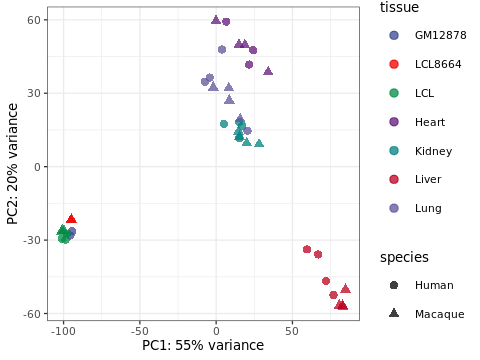

In [7]:
#plot PCA
options(repr.plot.width = 8, repr.plot.height = 6)

pcaData <- plotPCA(vsd, intgroup=c("species", "tissue"), returnData=TRUE) %>% rownames_to_column(var = "sample") %>% 
    filter(sample != "Human_Heart_R1") # this sample is actually lung and is mentioned as getting mixed up on GEO. 

pcaData$tissue <- factor(pcaData$tissue, levels = c("GM12878", "LCL8664", "LCL",
             "Heart", "Kidney", "Liver", "Lung"))

percentVar <- round(100 * attr(pcaData, "percentVar"))

p <- ggplot(pcaData, aes(PC1, PC2, color=tissue, shape=species)) +
  geom_point(size=2, alpha = 0.75) +
  xlab(paste0("PC1: ",percentVar[1],"% variance")) +
  ylab(paste0("PC2: ",percentVar[2],"% variance")) +
  ggsci::scale_color_aaas() +
  #scale_shape_manual(values = c(1,3)) +
  theme_bw(base_size = 8)

options(repr.plot.width = 4, repr.plot.height = 3)
p

ggsave(p, filename = "../../results/results_human-evolution/RNA-expression-PCA_w-Gilad-data.pdf", device = cairo_pdf, width = 4, height = 3)

## PCA with Human Blood Cells
We will repeat this using RNA-seq data from a variety of human blood cells to see how our cells compare to other immune cells

Use data from this accesssion: GSE118165

__RUNID__ __Cell-Type__  __DONOR__  
SRR11007061	CD8pos_T	1001  
SRR11007071	Effector_CD4pos_T	1001  
SRR11007082	Regulatory_T	1001  
SRR11007090	Mature_NK	1001  
SRR11007092	Monocytes	1001  
SRR11007094	Myeloid_DCs	1001  
SRR11007096	CD8pos_T	1002  
SRR11007113	Regulatory_T	1002  
SRR11007121	Mature_NK	1002  
SRR11007124	Monocytes	1002  
SRR11007126	Myeloid_DCs	1002  
SRR11007127	CD8pos_T	1003  
SRR11007137	Effector_CD4pos_T	1003  
SRR11007147	Regulatory_T	1003  
SRR11007156	Mature_NK	1003  
SRR11007158	Monocytes	1003    
SRR11007160	CD8pos_T	1004  
SRR11007170	Effector_CD4pos_T	1004  
SRR11007182	Regulatory_T	1004  
SRR11007186	Mature_NK	1004  
SRR11007188	Monocytes	1004  
SRR11007190	Myeloid_DCs	1004  
SRR7647654	Bulk_B	1001  
SRR7647656	Mem_B	1001  
SRR7647658	Naive_B	1001  
SRR7647696	Bulk_B	1002  
SRR7647698	Mem_B	1002  
SRR7647700	Naive_B	1002  
SRR7647731	Bulk_B	1003  
SRR7647767	Bulk_B	1004  
SRR7647768	Mem_B	1004  
SRR7647769	Naive_B	1004  
SRR7647807	Mem_B	1010  
SRR7647808	Naive_B	1010  

### Download Data:

In [ ]:
# bash kernel 

cd /data/hodges_lab/public_data/immune-cell_RNA-seq/Calderon_2019

fasterq-dump -3 --skip-technical --mem 64G --threads 8 --progress \
    SRR11007061 SRR11007071 SRR11007082 SRR11007090 SRR11007092 SRR11007094 SRR11007096 \
    SRR11007113 SRR11007121 SRR11007124 SRR11007126 SRR11007127 SRR11007137 SRR11007147 SRR11007156 \
    SRR11007158 SRR11007160 SRR11007170 SRR11007182 SRR11007186 SRR11007188 SRR11007190 SRR7647654 \
    SRR7647656 SRR7647656 SRR7647658 SRR7647696 SRR7647698 SRR7647700 SRR7647731 SRR7647767 SRR7647768 \
    SRR7647769 SRR7647807 SRR7647808

In [1]:
#stopped at SRR11007126. Run the rest as a slrm script. 
cat download_calderon-2019.slrm

#!/bin/bash
#SBATCH --mail-user=tyler.j.hansen@vanderbilt.edu
#SBATCH --mail-type=ALL
#SBATCH --nodes=1
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=12
#SBATCH --time=01-00:00:00
#SBATCH --mem=120G

#download data
cd /data/hodges_lab/public_data/immune-cell_RNA-seq/Calderon_2019

fasterq-dump -3 --skip-technical --mem 120G --threads 12 \
    SRR11007126 SRR11007127 SRR11007137 SRR11007147 SRR11007156 \
    SRR11007158 SRR11007160 SRR11007170 SRR11007182 SRR11007186 SRR11007188 SRR11007190 SRR7647654 \
    SRR7647656 SRR7647656 SRR7647658 SRR7647696 SRR7647698 SRR7647700 SRR7647731 SRR7647767 SRR7647768 \
    SRR7647769 SRR7647807 SRR7647808


SRR7647656 did not work for some reason. This is Mem_B 1001, so i will just omit that one from the following steps.

### Trim

In [1]:
cd /data/hodges_lab/public_data/immune-cell_RNA-seq/Calderon_2019
cat expt-sra_key.txt

CD8pos_T_1001	SRR11007061
Effector_CD4pos_T_1001	SRR11007071
Regulatory_T_1001	SRR11007082
Mature_NK_1001	SRR11007090
Monocytes_1001	SRR11007092
Myeloid_DCs_1001	SRR11007094
CD8pos_T_1002	SRR11007096
Regulatory_T_1002	SRR11007113
Mature_NK_1002	SRR11007121
Monocytes_1002	SRR11007124
Myeloid_DCs_1002	SRR11007126
CD8pos_T_1003	SRR11007127
Effector_CD4pos_T_1003	SRR11007137
Regulatory_T_1003	SRR11007147
Mature_NK_1003	SRR11007156
Monocytes_1003	SRR11007158
CD8pos_T_1004	SRR11007160
Effector_CD4pos_T_1004	SRR11007170
Regulatory_T_1004	SRR11007182
Mature_NK_1004	SRR11007186
Monocytes_1004	SRR11007188
Myeloid_DCs_1004	SRR11007190
Bulk_B_1001	SRR7647654
Naive_B_1001	SRR7647658
Bulk_B_1002	SRR7647696
Mem_B_1002	SRR7647698
Naive_B_1002	SRR7647700
Bulk_B_1003	SRR7647731
Bulk_B_1004	SRR7647767
Mem_B_1004	SRR7647768
Naive_B_1004	SRR7647769
Mem_B_1010	SRR7647807
Naive_B_1010	SRR7647808



In [2]:
#submit job.
cat trim_calderon-2019.slrm

sbatch trim_calderon-2019.slrm

#!/bin/bash
#SBATCH --mail-user=tyler.j.hansen@vanderbilt.edu
#SBATCH --mail-type=ALL
#SBATCH --nodes=1
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=12
#SBATCH --time=01-00:00:00
#SBATCH --mem=120G

cd /data/hodges_lab/public_data/immune-cell_RNA-seq/Calderon_2019

#trim
# use read combined with while loop to read two variables at once.
DIR='/data/hodges_lab/public_data/immune-cell_RNA-seq/Calderon_2019'

while read -r a b ; do    
    trim_galore --paired -j 12 --fastqc --fastqc_args "--outdir ${DIR}/processing_results/fastQC" --dont_gzip --basename "$a" \
    --output_dir ${DIR}/fastq/trimmed_reads ${DIR}/fastq/"$b"_1.fastq ${DIR}/fastq/"$b"_2.fastq 
done < expt-sra_key.txt
Submitted batch job 39138666


In [2]:
#I forgot to move some fastqs over so, repeat but only on those.
cat /data/hodges_lab/public_data/immune-cell_RNA-seq/Calderon_2019/expt-sra_key_2.txt

Naive_B_1001	SRR7647658
Bulk_B_1002	SRR7647696
Mem_B_1002	SRR7647698
Naive_B_1002	SRR7647700
Bulk_B_1003	SRR7647731
Bulk_B_1004	SRR7647767
Mem_B_1004	SRR7647768
Naive_B_1004	SRR7647769
Mem_B_1010	SRR7647807
Naive_B_1010	SRR7647808


In [4]:
cat trim_calderon-2019_2.slrm
sbatch trim_calderon-2019_2.slrm

#!/bin/bash
#SBATCH --mail-user=tyler.j.hansen@vanderbilt.edu
#SBATCH --mail-type=ALL
#SBATCH --nodes=1
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=12
#SBATCH --time=08:00:00
#SBATCH --mem=120G

cd /data/hodges_lab/public_data/immune-cell_RNA-seq/Calderon_2019

#trim
# use read combined with while loop to read two variables at once.
DIR='/data/hodges_lab/public_data/immune-cell_RNA-seq/Calderon_2019'

while read -r a b ; do    
    trim_galore --paired -j 12 --fastqc --fastqc_args "--outdir ${DIR}/processing_results/fastQC" --dont_gzip --basename "$a" \
    --output_dir ${DIR}/fastq/trimmed_reads ${DIR}/fastq/"$b"_1.fastq ${DIR}/fastq/"$b"_2.fastq 
done < expt-sra_key_2.txt
Submitted batch job 39145478


### Map

In [1]:
cat map_calderon-2019.slrm

#!/bin/bash
#SBATCH --mail-user=tyler.j.hansen@vanderbilt.edu
#SBATCH --mail-type=ALL
#SBATCH --nodes=1
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=12
#SBATCH --time=01-00:00:00
#SBATCH --mem=120G

cd /data/hodges_lab/public_data/immune-cell_RNA-seq/Calderon_2019

#trim
# use read combined with while loop to read two variables at once.
DIR='/data/hodges_lab/public_data/immune-cell_RNA-seq/Calderon_2019'

while read -r a b ; do    
    STAR --runMode alignReads --runThreadN 12 --genomeDir /data/hodges_lab/hg38_genome/hg38_GTF-ensembl.104_index_99 \
    --readFilesIn ${DIR}/fastq/trimmed_reads/"$a"_val_1.fq ${DIR}/fastq/trimmed_reads/"$a"_val_2.fq \
    --outFileNamePrefix ${DIR}/star-output/"$a"_ensembl.104_ --outSAMtype BAM SortedByCoordinate
done < expt-sra_key.txt


In [1]:
#It did all but the last one. So run that here. 
cd /data/hodges_lab/public_data/immune-cell_RNA-seq/Calderon_2019

#trim
# use read combined with while loop to read two variables at once.
DIR='/data/hodges_lab/public_data/immune-cell_RNA-seq/Calderon_2019'

STAR --runMode alignReads --runThreadN 8 --genomeDir /data/hodges_lab/hg38_genome/hg38_GTF-ensembl.104_index_99 \
    --readFilesIn ${DIR}/fastq/trimmed_reads/Naive_B_1010_val_1.fq ${DIR}/fastq/trimmed_reads/Naive_B_1010_val_2.fq \
    --outFileNamePrefix ${DIR}/star-output/Naive_B_1010_ensembl.104_ --outSAMtype BAM SortedByCoordinate

	STAR --runMode alignReads --runThreadN 8 --genomeDir /data/hodges_lab/hg38_genome/hg38_GTF-ensembl.104_index_99 --readFilesIn /data/hodges_lab/public_data/immune-cell_RNA-seq/Calderon_2019/fastq/trimmed_reads/Naive_B_1010_val_1.fq /data/hodges_lab/public_data/immune-cell_RNA-seq/Calderon_2019/fastq/trimmed_reads/Naive_B_1010_val_2.fq --outFileNamePrefix /data/hodges_lab/public_data/immune-cell_RNA-seq/Calderon_2019/star-output/Naive_B_1010_ensembl.104_ --outSAMtype BAM SortedByCoordinate
	STAR version: 2.7.10a   compiled: 2022-01-14T18:50:00-05:00 :/home/dobin/data/STAR/STARcode/STAR.master/source
Mar 28 10:48:31 ..... started STAR run
Mar 28 10:48:46 ..... loading genome
Mar 28 10:55:23 ..... started mapping
Mar 28 11:20:28 ..... finished mapping
Mar 28 11:20:32 ..... started sorting BAM
Mar 28 11:28:55 ..... finished successfully


### Count

In [1]:
cat count_Calderon-2019.slrm

#!/bin/bash
#SBATCH --mail-user=tyler.j.hansen@vanderbilt.edu
#SBATCH --mail-type=ALL
#SBATCH --nodes=1
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=12
#SBATCH --time=01-00:00:00
#SBATCH --mem=120G

HG38_FA='/data/hodges_lab/hg38_genome/hg38.fa'
HG38_GTF='/data/hodges_lab/ATAC-STARR_B-cells/data/RNA-seq/Ensembl.v64.fullTransExon.hg19TorheMac2.hg38.gtf'
INT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/RNA-seq'
PUB_DIR='/data/hodges_lab/public_data/immune-cell_RNA-seq/Calderon_2019'

#Seperate into two files, one for paired end reads (ours) the other for single end reads (public data). Join afterwards. 
# For the PE file, will need to assess if fragments or individual reads are counted. 
# For both files, do unstranded mapping since I'm not sure if the public data is forward or reverse stranded. 

#Human
featureCounts -s 0 -p -B -O -T 12 -F GTF -G $HG38_FA -t exon -g gene_id \
        -a $HG38_GTF -o ${INT_DIR}/count_matricies/Human_Immune-Cell_RNA-seq_counts_XSAnno_PE.tsv \
        ${PUB

### PCA

In [1]:
# r kernel
suppressPackageStartupMessages(library(tidyverse))

dir <- "/data/hodges_lab/ATAC-STARR_B-cells/data/RNA-seq/count_matricies/"

#read in cts
AS <- read_tsv(paste0(dir,"Human_cross-tissue_RNA-seq_counts_XSAnno_PE.tsv"), 
                     col_names = c("gene_id", "Chr", "Start", "End", "Strand", "Length", "GM12878_R1", "GM12878_R2"), 
                     skip = 2) %>% dplyr::select(-Chr, -Start, -End, -Strand, -Length)
                     
C <- read_tsv(paste0(dir,"Human_Immune-Cell_RNA-seq_counts_XSAnno_PE.tsv"), 
                     col_names = c("gene_id", "Chr", "Start", "End", "Strand", "Length", 
                     "Bulk_B_1001", "Bulk_B_1002", "Bulk_B_1003", "Bulk_B_1004",
                     "CD8pos_T_1001", "CD8pos_T_1002", "CD8pos_T_1003", "CD8pos_T_1004",
                     "Effector_CD4pos_T_1001", "Effector_CD4pos_T_1003", "Effector_CD4pos_T_1004",
                     "Mature_NK_1001", "Mature_NK_1002", "Mature_NK_1003", "Mature_NK_1004",
                     "Mem_B_1002_1", "Mem_B_1002_2","Mem_B_1010",
                     "Monocytes_1001", "Monocytes_1002", "Monocytes_1003", "Monocytes_1004",
                     "Myeloid_DCs_1001", "Myeloid_DCs_1002","Myeloid_DCs_1004",
                     "Naive_B_1001", "Naive_B_1002", "Naive_B_1004", "Naive_B_1010",
                     "Regulatory_T_1001", "Regulatory_T_1002", "Regulatory_T_1003", "Regulatory_T_1004"), 
                     skip = 2) %>% dplyr::select(-Chr, -Start, -End, -Strand, -Length, -Mem_B_1002_2, Mem_B_1002 = Mem_B_1002_1)

Rows: 27898 Columns: 8

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): gene_id, Chr, Start, End, Strand
dbl (3): Length, GM12878_R1, GM12878_R2


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 27898 Columns: 39

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (5): gene_id, Chr, Start, End, Strand
dbl (34): Length, Bulk_B_1001, Bulk_B_1002, Bulk_B_1003, Bulk_B_1004, CD8pos...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [2]:
M <- read_tsv(paste0(dir,"Macaque_cross-tissue_RNA-seq_counts_XSAnno_PE.tsv"), 
                     col_names = c("gene_id", "Chr", "Start", "End", "Strand", "Length", "LCL8664_R1", "LCL8664_R2"), 
                     skip = 2) %>% dplyr::select(-Chr, -Start, -End, -Strand, -Length)

Rows: 27762 Columns: 8

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): gene_id, Chr, Start, End, Strand
dbl (3): Length, LCL8664_R1, LCL8664_R2


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [3]:
#join counts and assign gene_id to row_names
cts <- inner_join(AS, M, by = "gene_id") %>% 
    inner_join(C, by = "gene_id") %>% 
    column_to_rownames(var = "gene_id") %>%
    as.matrix()

In [4]:
# Prepare dataframe of sample info
RNames <- c( "GM12878_R1", "GM12878_R2", "LCL8664_R1", "LCL8664_R2",
             "Bulk_B_1001", "Bulk_B_1002", "Bulk_B_1003", "Bulk_B_1004",
             "CD8pos_T_1001", "CD8pos_T_1002", "CD8pos_T_1003", "CD8pos_T_1004",
             "Effector_CD4pos_T_1001", "Effector_CD4pos_T_1003", "Effector_CD4pos_T_1004",
             "Mature_NK_1001", "Mature_NK_1002", "Mature_NK_1003", "Mature_NK_1004",
             "Mem_B_1002", "Mem_B_1010",
             "Monocytes_1001", "Monocytes_1002", "Monocytes_1003", "Monocytes_1004",
             "Myeloid_DCs_1001", "Myeloid_DCs_1002","Myeloid_DCs_1004",
             "Naive_B_1001", "Naive_B_1002", "Naive_B_1004", "Naive_B_1010",
             "Regulatory_T_1001", "Regulatory_T_1002", "Regulatory_T_1003", "Regulatory_T_1004")

cell_type <- c("GM12878", "GM12878", "LCL8664", "LCL8664",
             "Bulk_B", "Bulk_B", "Bulk_B", "Bulk_B",
             "CD8pos_T", "CD8pos_T", "CD8pos_T", "CD8pos_T",
             "Effector_CD4pos_T", "Effector_CD4pos_T", "Effector_CD4pos_T",
             "Mature_NK", "Mature_NK", "Mature_NK", "Mature_NK",
             "Mem_B", "Mem_B",
             "Monocytes", "Monocytes", "Monocytes", "Monocytes",
             "Myeloid_DCs", "Myeloid_DCs","Myeloid_DCs",
             "Naive_B", "Naive_B", "Naive_B", "Naive_B",
             "Regulatory_T", "Regulatory_T", "Regulatory_T", "Regulatory_T")
             
replicates <- c("Rep1", "Rep2", "Rep1", "Rep2",
             "Rep1", "Rep2", "Rep3", "Rep4", 
             "Rep1", "Rep2", "Rep3", "Rep4",
             "Rep1", "Rep2", "Rep3",
             "Rep1", "Rep2", "Rep3", "Rep4", 
             "Rep1", "Rep2",
             "Rep1", "Rep2", "Rep3", "Rep4", 
             "Rep1", "Rep2", "Rep3",
             "Rep1", "Rep2", "Rep3", "Rep4",
             "Rep1", "Rep2", "Rep3", "Rep4")

coldata <- data.frame(row.names = RNames, cell_type, replicates)

In [5]:
#check that the coldata matches data. It should print TRUE. 
print(all(rownames(coldata) == colnames(cts))) 

[1] TRUE


In [6]:
#normalize counts with DESeq2:
library("DESeq2")
dds <- DESeqDataSetFromMatrix(countData = cts,
                              colData = coldata,
                              design = ~ cell_type)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:dplyr’:

    first, rename


The following object is masked from ‘package:tidyr’:

    expand


The following objects are masked from ‘pac

In [9]:
#VST normalize and use variance accross all samples
vsd <- vst(dds, blind=TRUE)

Warning message:
“This manual palette can handle a maximum of 10 values. You have supplied 11.”
Warning message:
“This manual palette can handle a maximum of 10 values. You have supplied 11.”


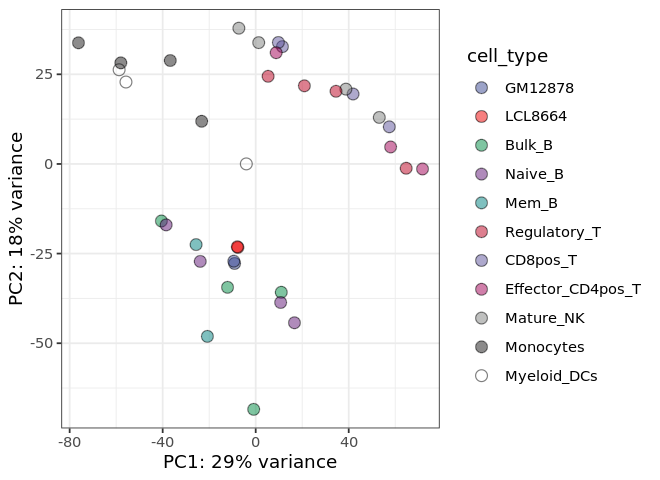

In [11]:
#plot PCA
options(repr.plot.width = 8, repr.plot.height = 6)

pcaData <- plotPCA(vsd, intgroup=c("cell_type"), returnData=TRUE)

pcaData$cell_type <- factor(pcaData$cell_type, levels = c("GM12878", "LCL8664", "Bulk_B", "Naive_B", "Mem_B", 
                                        "Regulatory_T", "CD8pos_T","Effector_CD4pos_T", 
                                        "Mature_NK", "Monocytes", "Myeloid_DCs"))

percentVar <- round(100 * attr(pcaData, "percentVar"))

p <- ggplot(pcaData, aes(PC1, PC2, fill=cell_type)) +
  geom_point(size=3, alpha = 0.5, shape = 21, color = "black") +
  xlab(paste0("PC1: ",percentVar[1],"% variance")) +
  ylab(paste0("PC2: ",percentVar[2],"% variance")) +
  ggsci::scale_fill_aaas() +
  theme_bw() +
  theme(legend.position = "right")
options(repr.plot.width = 5.5, repr.plot.height = 4)
p

ggsave(p, filename = "../../results/results_human-evolution/RNA-expression-PCA_w-Immune-Cell-data.pdf", device = cairo_pdf, width = 5.5, height = 4)